In [12]:
# Reads in XIA counter data of Am241 source, makes simple plots
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid') # Style style so background is white
sns.set_context("talk") # Make fonts bigger

In [13]:
dfSignal = pd.read_csv('/Users/brianzhu/Desktop/XIA/Data/AnalysisResults_09072017_2.csv', 
                       sep=',', header=11)
dfFull = dfSignal.drop('# Event ID', axis=1)

dfFull['RiseTime'] = dfSignal['Anode tR (microseconds)'] - dfSignal['Anode t0 (microseconds)']
dfFull.head(10)

,Trigger time (s),Event class,Anode amplitude (ADC),Anode energy (MeV),Anode t0 (microseconds),Anode tS (microseconds),Anode tR (microseconds),RiseTime
0,0.034,MidAir,2880.90548,5.83079,89.0,141.35094,148.40896,59.40896
1,0.035,MidAir,2487.51683,5.51370,92.5,128.08553,141.66435,49.16435
2,0.036,MidAir,2479.38409,5.83705,91.5,123.45351,143.02257,51.52257
3,0.049,MidAir,2698.12836,5.60112,92.0,137.43660,146.24942,54.24942
4,0.145,MidAir,2646.02580,5.46426,90.0,133.86949,141.93925,51.93925
5,0.176,MidAir,2791.88112,5.72227,89.5,137.98593,145.78605,56.28605
6,0.188,MidAir,2770.03854,5.54866,92.0,138.48831,143.68045,51.68045
7,0.210,MidAir,2777.79505,5.47913,91.0,142.82669,146.93518,55.93518
8,0.216,Alpha,2578.02874,5.76432,80.0,127.22124,142.86266,62.86266
9,0.218,MidAir,2827.65435,5.91099,91.0,136.82952,146.54096,55.54096


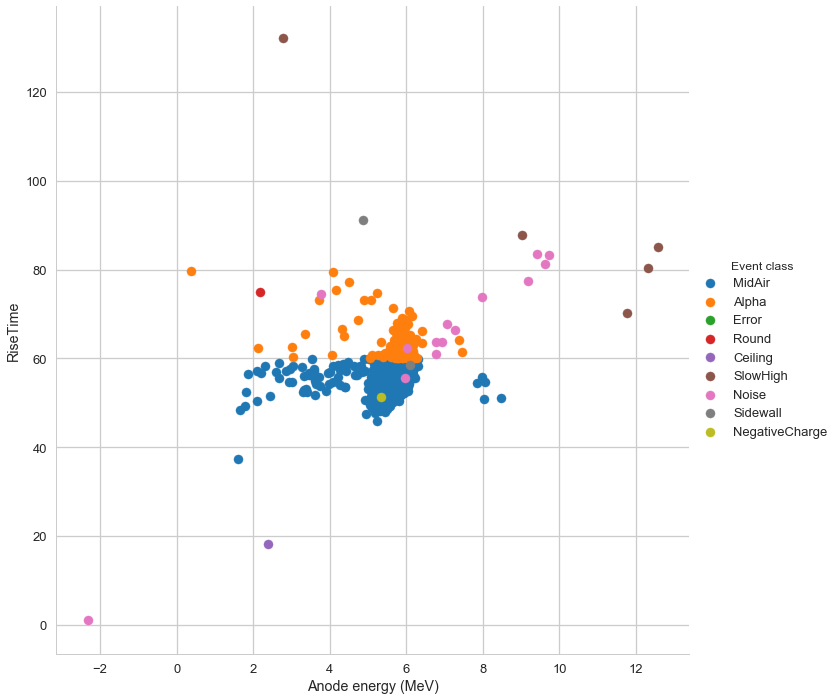

In [14]:
# Draw RiseTime vs Energy as a scatter plot
g1 = sns.FacetGrid(data=dfFull, size=10, hue='Event class')
g1 = g1.map(plt.scatter, "Anode energy (MeV)", "RiseTime").add_legend()
g1.savefig('RisetimeVSEnergy.pdf')

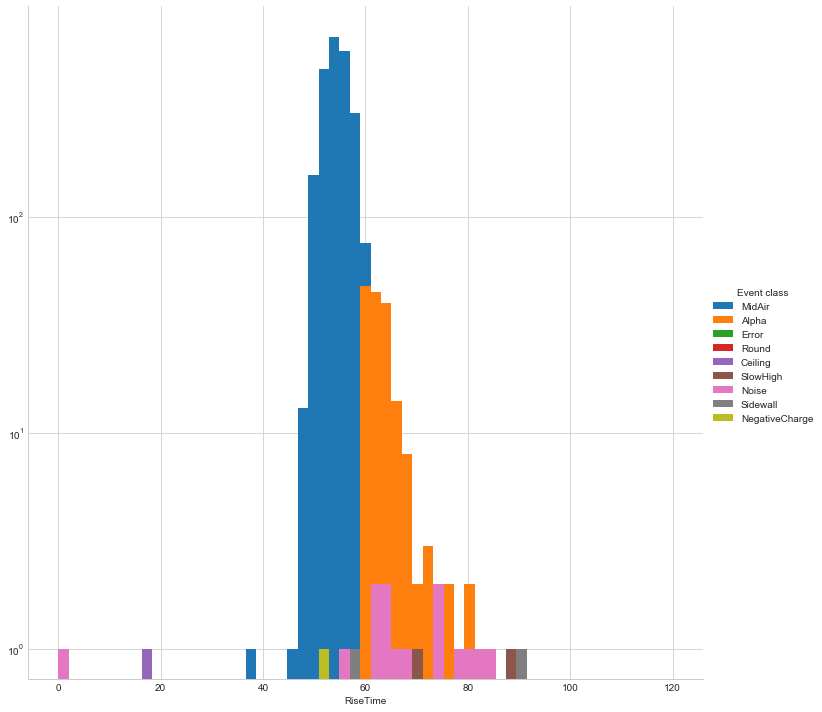

In [4]:
# Draw RiseTime as a histogram
g2 = sns.FacetGrid(data=dfFull, size=10, hue='Event class')
g2 = g2.map(plt.hist, "RiseTime", bins=np.linspace(0,120,60))
g2.add_legend()
g2.set(yscale='log')
g2.savefig('Risetime.pdf')

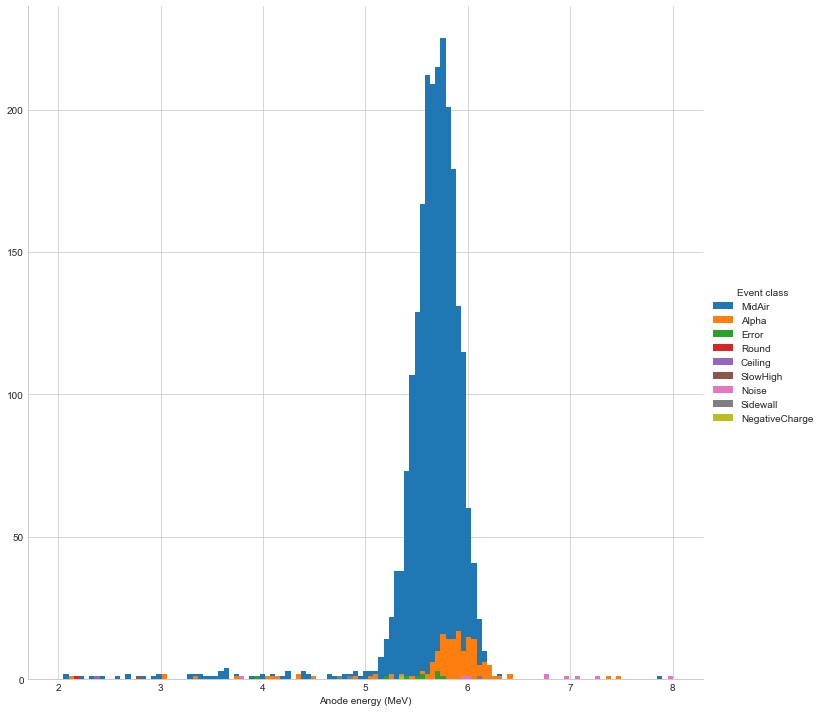

In [5]:
# Draw Energy as a histogram
g3 = sns.FacetGrid(data=dfFull, size=10, hue='Event class')
g3 = g3.map(plt.hist, "Anode energy (MeV)", bins=np.linspace(2,8,120))
g3.add_legend()
# g3.set(yscale='log')
g3.savefig('Energy.pdf')